In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats

In [2]:
df=pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
x = df.drop(columns=['Strength'])
y = df['Strength']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score :',r2_score(y_test,y_pred))

r2_score : 0.627553179231485


In [15]:
print(np.mean(cross_val_score(lr,x,y,scoring='r2')))

0.4609940491662864


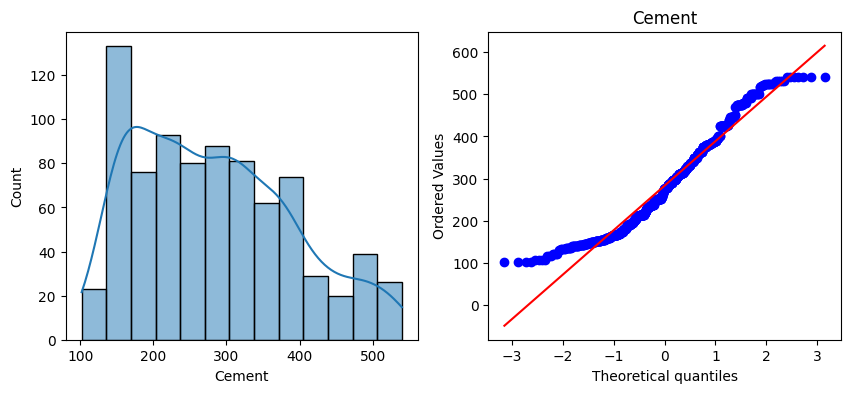

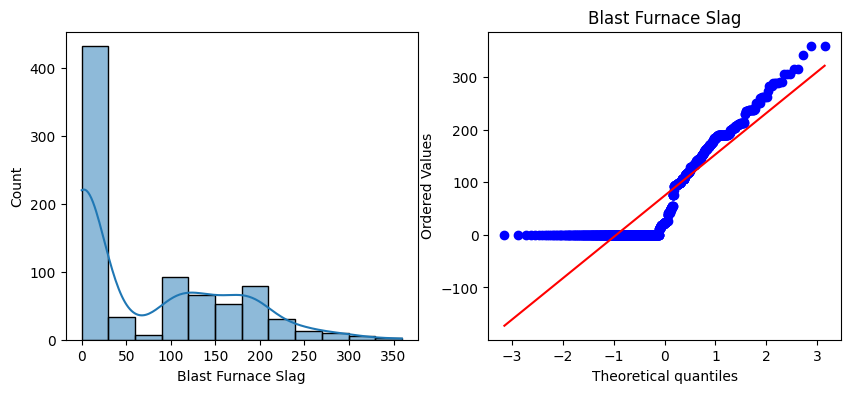

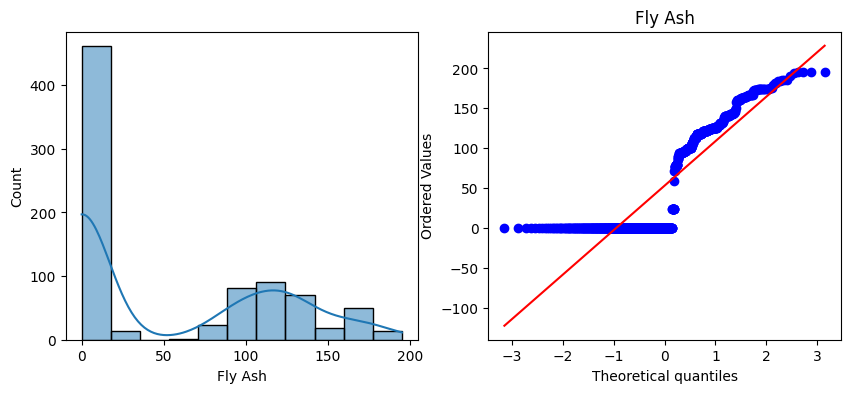

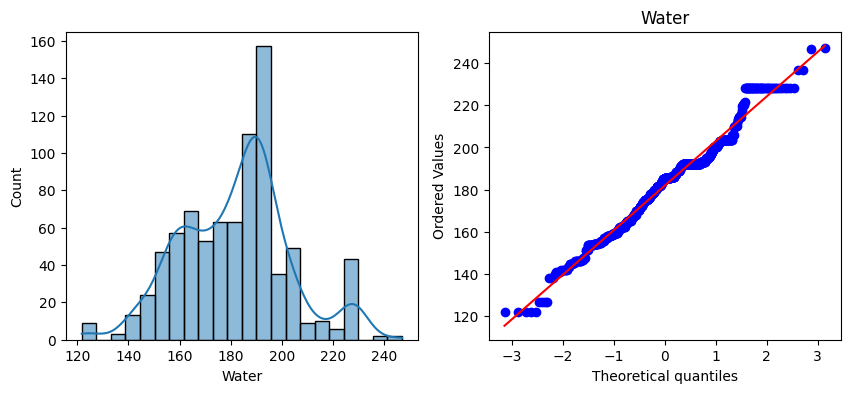

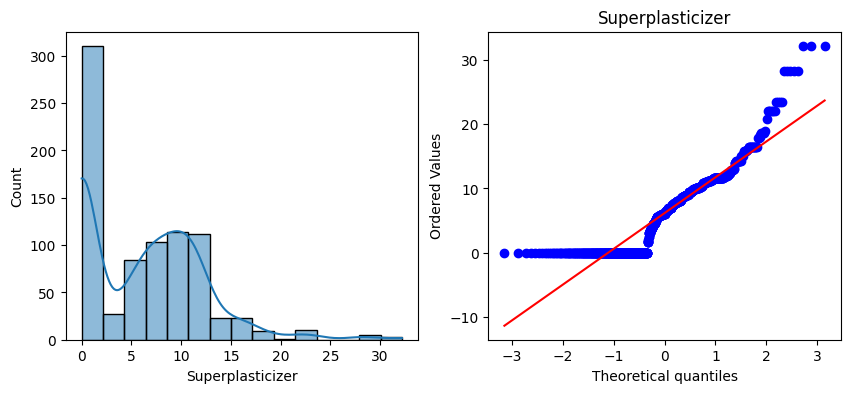

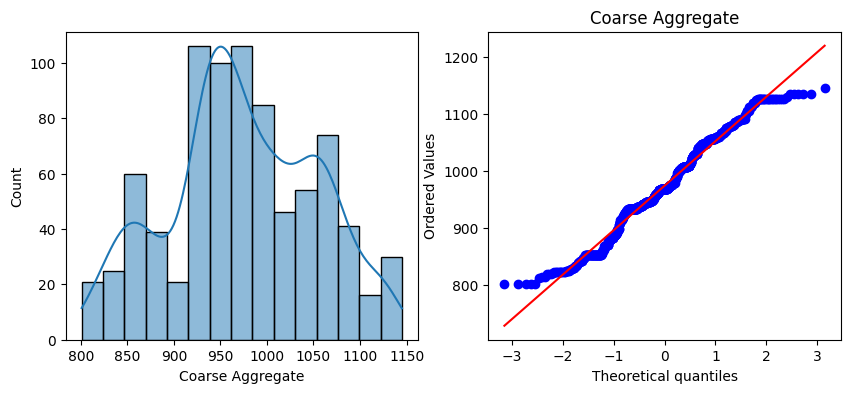

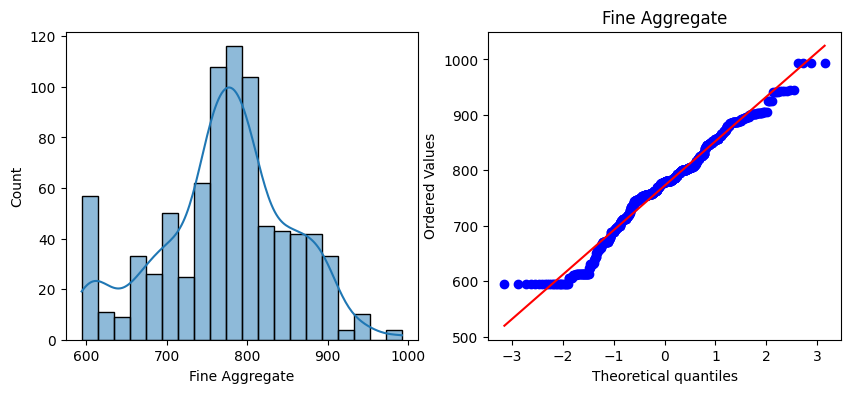

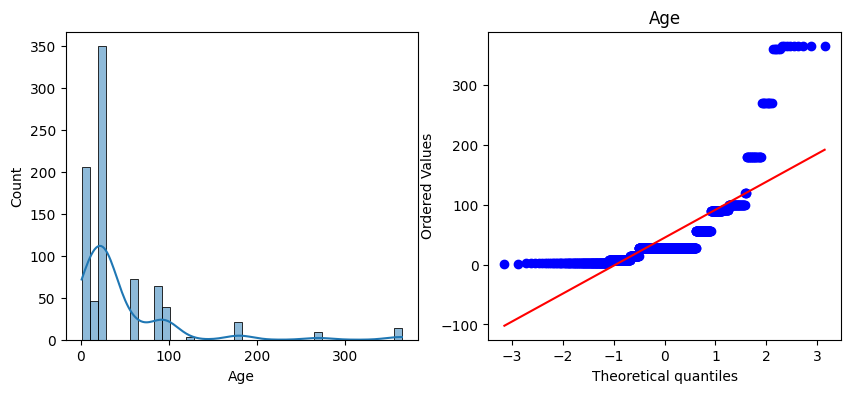

In [22]:
for col in x_train.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.histplot(x_train[col],kde=True)
    
    plt.subplot(122)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.title(col)

yeo-johnson method

In [29]:
# pt=PowerTransformer()
# x_train_pt=pt.fit_transform(x_train)
# x_test_pt=pt.transform(x_test)
# lr=LinearRegression()
# lr.fit(x_train_pt,y_train)
# y_pred=lr.predict(x_test_pt)
# print(r2_score(y_test,y_pred))

0.8161906513339305


box-cox method

In [30]:
pt=PowerTransformer(method='box-cox')
x_train_pt=pt.fit_transform(x_train+0.000001)
x_test_pt=pt.transform(x_test+0.000001)

In [31]:
lr=LinearRegression()
lr.fit(x_train_pt,y_train)
y_pred=lr.predict(x_test_pt)
print(r2_score(y_test,y_pred))

0.8047825006181187


In [32]:
print(np.mean(cross_val_score(lr,x,y,scoring='r2')))

0.4609940491662864


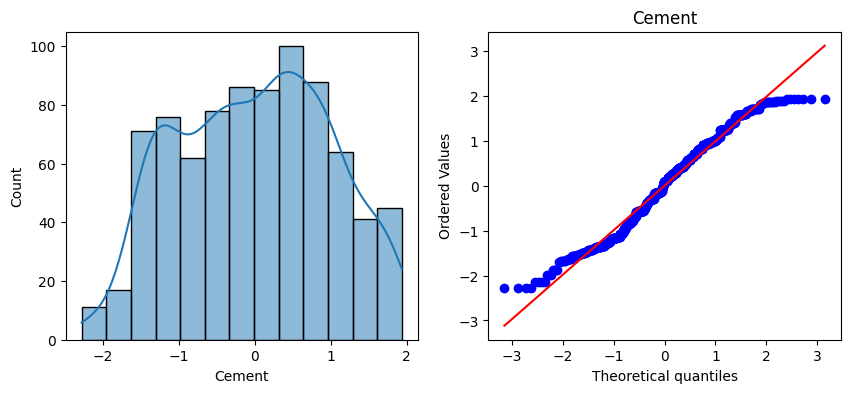

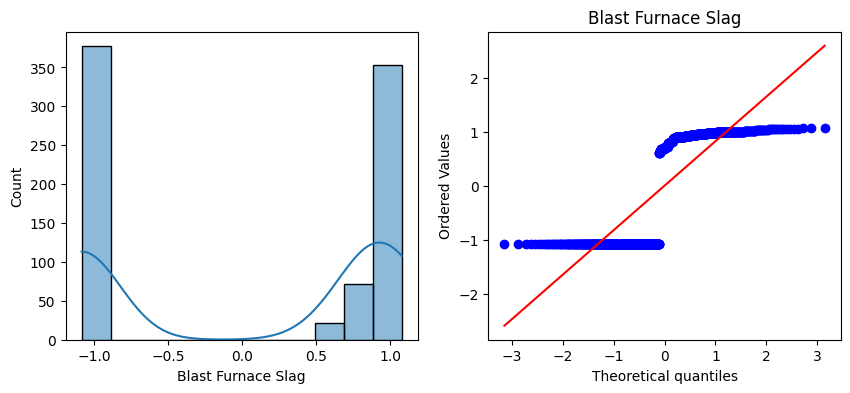

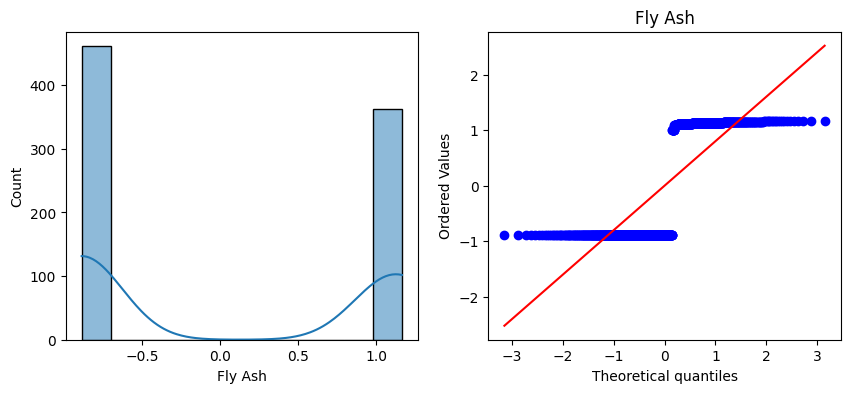

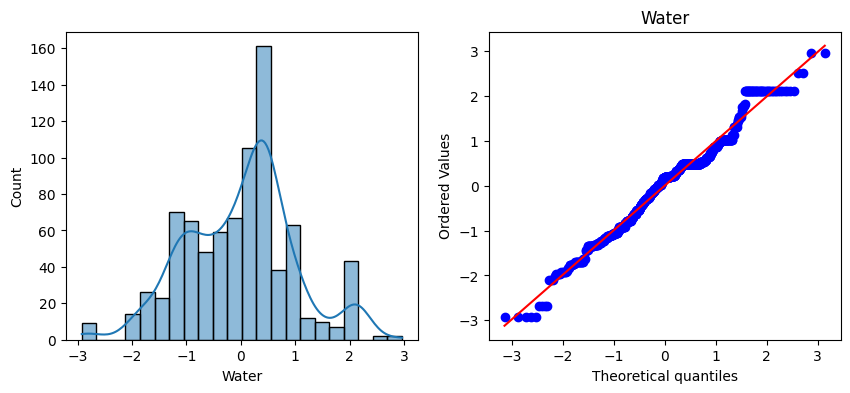

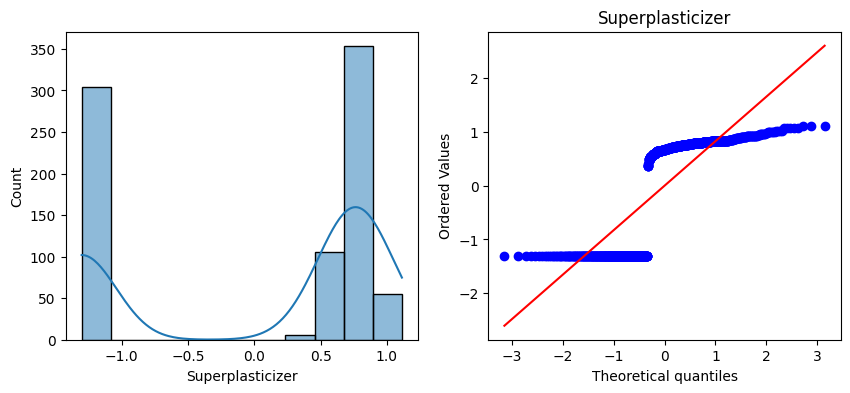

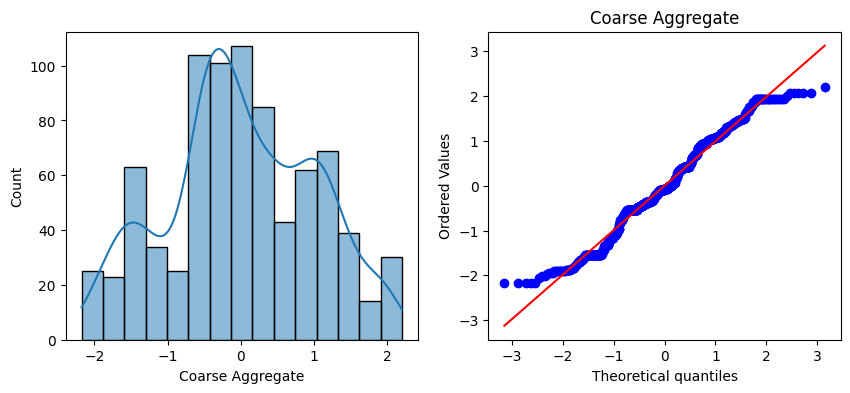

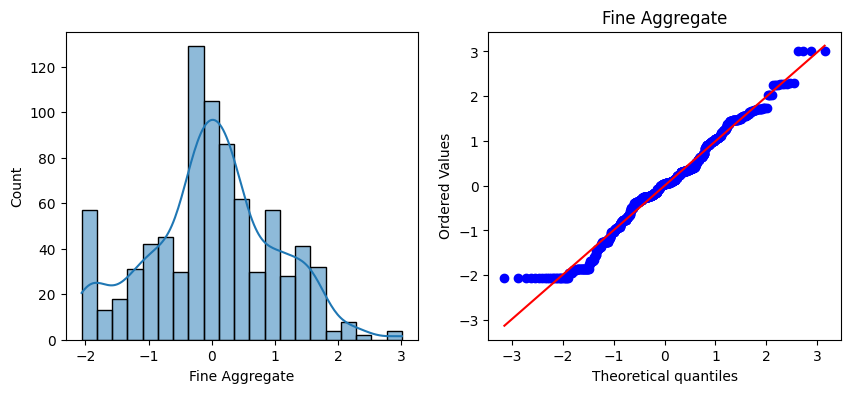

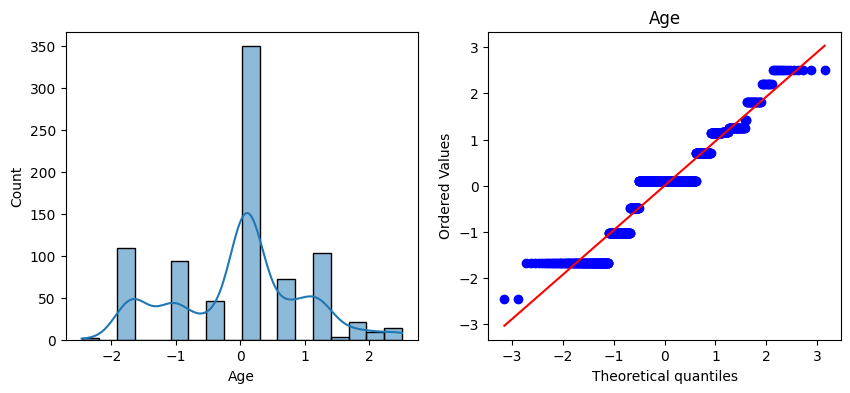

In [35]:
x_train_pt=pd.DataFrame(x_train_pt,columns=x_train.columns)
for col in x_train_pt.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.histplot(x_train_pt[col],kde=True)
    
    plt.subplot(122)
    stats.probplot(x_train_pt[col],dist='norm',plot=plt)
    plt.title(col)

In [36]:
pt.lambdas_

array([ 0.17702534,  0.02509305, -0.03897048,  0.77268163,  0.09881088,
        1.12981334,  1.78201858,  0.06663092])